In [71]:
import pandas as pd
import matplotlib.pyplot as plt
#from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing  

In [72]:
# import some data to play with
df = pd.read_csv('Company_Data.csv')

In [73]:
df.head(5)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [74]:
df.tail(5)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes
399,9.71,134,37,0,27,120,Good,49,16,Yes,Yes


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [76]:
df.isnull().any()

Sales          False
CompPrice      False
Income         False
Advertising    False
Population     False
Price          False
ShelveLoc      False
Age            False
Education      False
Urban          False
US             False
dtype: bool

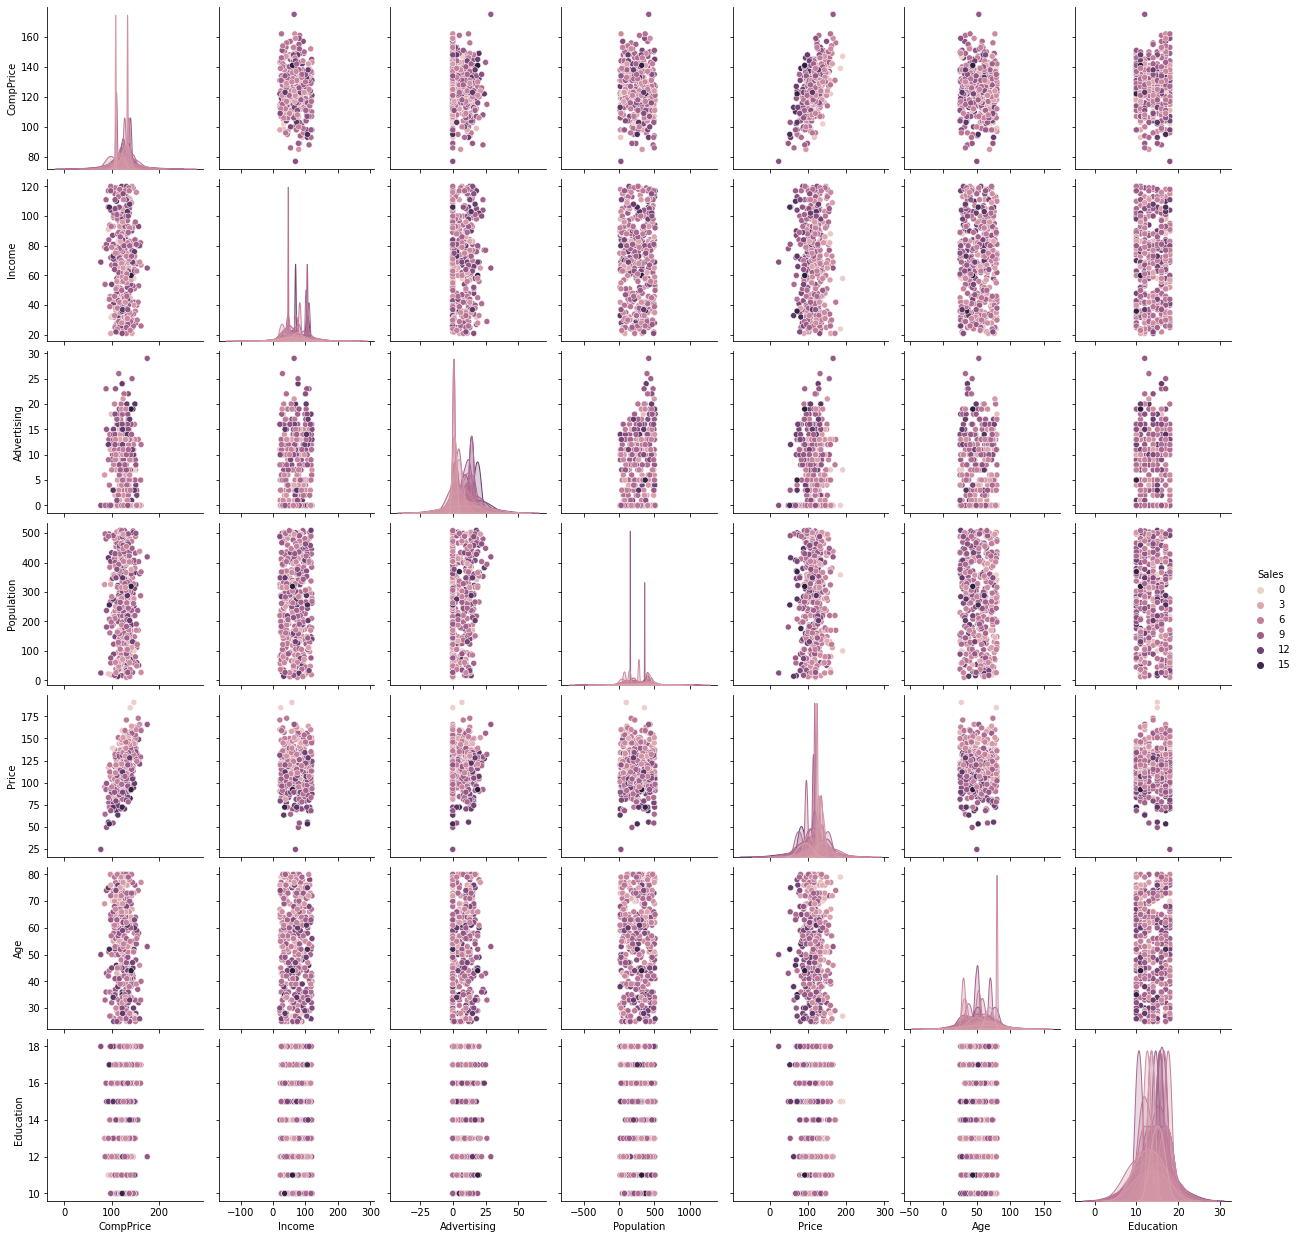

In [77]:
import seaborn as sns
sns.pairplot(data=df,hue="Sales")

In [78]:
#Creating dummy variables
df=pd.get_dummies(df,columns=["Urban","US"],drop_first=True)

In [79]:
df['ShelveLoc']=df['ShelveLoc'].map({'Good':1,'Medium':2,'Bad':3})

In [80]:
print(df.head(5))

   Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0   9.50        138      73           11         276    120          3   42   
1  11.22        111      48           16         260     83          1   65   
2  10.06        113      35           10         269     80          2   59   
3   7.40        117     100            4         466     97          2   55   
4   4.15        141      64            3         340    128          3   38   

   Education  Urban_Yes  US_Yes  
0         17          1       1  
1         10          1       1  
2         12          1       1  
3         14          1       1  
4         13          1       0  


In [81]:
df.Sales.min()

0.0

In [82]:
df.Sales.max()

16.27

In [83]:
df.Sales.value_counts()

7.80     4
8.77     3
9.32     3
4.10     3
6.20     3
5.87     3
6.53     3
6.88     3
6.67     3
9.16     2
4.42     2
7.49     2
7.71     2
5.68     2
8.67     2
8.47     2
5.36     2
11.48    2
7.56     2
6.50     2
3.90     2
8.55     2
5.32     2
8.01     2
12.57    2
7.52     2
6.97     2
8.19     2
3.47     2
11.27    2
6.52     2
5.30     2
7.22     2
12.49    2
7.41     2
5.58     2
4.53     2
4.81     2
5.17     2
11.70    2
6.03     2
6.71     2
4.90     2
5.08     2
5.94     2
11.19    2
8.68     2
7.81     2
10.26    2
9.01     2
7.78     2
4.69     2
6.41     2
4.95     2
3.42     1
4.55     1
5.31     1
9.10     1
4.83     1
5.40     1
5.83     1
7.74     1
5.01     1
8.69     1
6.68     1
11.99    1
3.45     1
6.93     1
6.43     1
2.34     1
2.86     1
12.98    1
5.16     1
10.04    1
5.73     1
4.34     1
9.70     1
10.62    1
10.59    1
10.00    1
8.09     1
7.36     1
6.90     1
7.82     1
5.04     1
4.68     1
12.01    1
5.05     1
10.31    1
3.72     1
7.53     1

In [84]:
Sales=df.Sales.median()

In [85]:
Sales

7.49

In [86]:
df.loc[df["Sales"]>=7.5,"sale"]="High"

In [87]:
df.loc[df["Sales"]<=7.5,"sale"]="Low"

In [88]:
df.sale.value_counts()

Low     202
High    198
Name: sale, dtype: int64

In [89]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes,sale
0,9.50,138,73,11,276,120,3,42,17,1,1,High
1,11.22,111,48,16,260,83,1,65,10,1,1,High
2,10.06,113,35,10,269,80,2,59,12,1,1,High
3,7.40,117,100,4,466,97,2,55,14,1,1,Low
4,4.15,141,64,3,340,128,3,38,13,1,0,Low
5,10.81,124,113,13,501,72,3,78,16,0,1,High
6,6.63,115,105,0,45,108,2,71,15,1,0,Low
7,11.85,136,81,15,425,120,1,67,10,1,1,High
8,6.54,132,110,0,108,124,2,76,10,0,0,Low
9,4.69,132,113,0,131,124,2,76,17,0,1,Low


In [90]:
#Creating dummy variables
df=pd.get_dummies(df,columns=["sale"],drop_first=True)

In [91]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes,sale_Low
0,9.50,138,73,11,276,120,3,42,17,1,1,0
1,11.22,111,48,16,260,83,1,65,10,1,1,0
2,10.06,113,35,10,269,80,2,59,12,1,1,0
3,7.40,117,100,4,466,97,2,55,14,1,1,1
4,4.15,141,64,3,340,128,3,38,13,1,0,1
5,10.81,124,113,13,501,72,3,78,16,0,1,0
6,6.63,115,105,0,45,108,2,71,15,1,0,1
7,11.85,136,81,15,425,120,1,67,10,1,1,0
8,6.54,132,110,0,108,124,2,76,10,0,0,1
9,4.69,132,113,0,131,124,2,76,17,0,1,1


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    int64  
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban_Yes    400 non-null    uint8  
 10  US_Yes       400 non-null    uint8  
 11  sale_Low     400 non-null    uint8  
dtypes: float64(1), int64(8), uint8(3)
memory usage: 29.4 KB


In [93]:
#Split the dataset into two variables
X=df.iloc[:,1:11]
y=df.iloc[:,11]

In [94]:
X 
pd.set_option("display.max_rows", None) 

In [95]:
X

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,138,73,11,276,120,3,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,3,38,13,1,0
5,124,113,13,501,72,3,78,16,0,1
6,115,105,0,45,108,2,71,15,1,0
7,136,81,15,425,120,1,67,10,1,1
8,132,110,0,108,124,2,76,10,0,0
9,132,113,0,131,124,2,76,17,0,1


In [96]:
y

0      0
1      0
2      0
3      1
4      1
5      0
6      1
7      0
8      1
9      1
10     0
11     0
12     1
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     1
21     0
22     1
23     1
24     0
25     0
26     0
27     1
28     1
29     0
30     0
31     0
32     1
33     0
34     1
35     0
36     0
37     1
38     1
39     1
40     1
41     0
42     0
43     1
44     1
45     1
46     0
47     1
48     1
49     0
50     1
51     1
52     0
53     1
54     1
55     1
56     0
57     1
58     1
59     1
60     0
61     1
62     1
63     0
64     0
65     1
66     0
67     0
68     0
69     0
70     0
71     1
72     1
73     0
74     1
75     0
76     0
77     0
78     1
79     0
80     0
81     0
82     0
83     1
84     1
85     0
86     0
87     0
88     1
89     0
90     1
91     1
92     1
93     0
94     0
95     1
96     0
97     1
98     0
99     1
100    1
101    1
102    1
103    1
104    1
105    1
106    1
107    0
108    1
109    0
110    0
1

In [97]:
colnames = list(df.columns)
colnames

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban_Yes',
 'US_Yes',
 'sale_Low']

In [98]:
#split data in Train and Test 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# Decision Tree Model

# Building Classifier Tree Classifier using Entropy criteria 

In [99]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(X_train,y_train) 

DecisionTreeClassifier(criterion='entropy', max_depth=3)

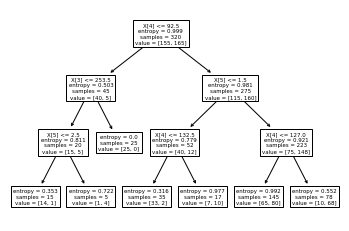

In [100]:
#PLot the decision tree
tree.plot_tree(model);


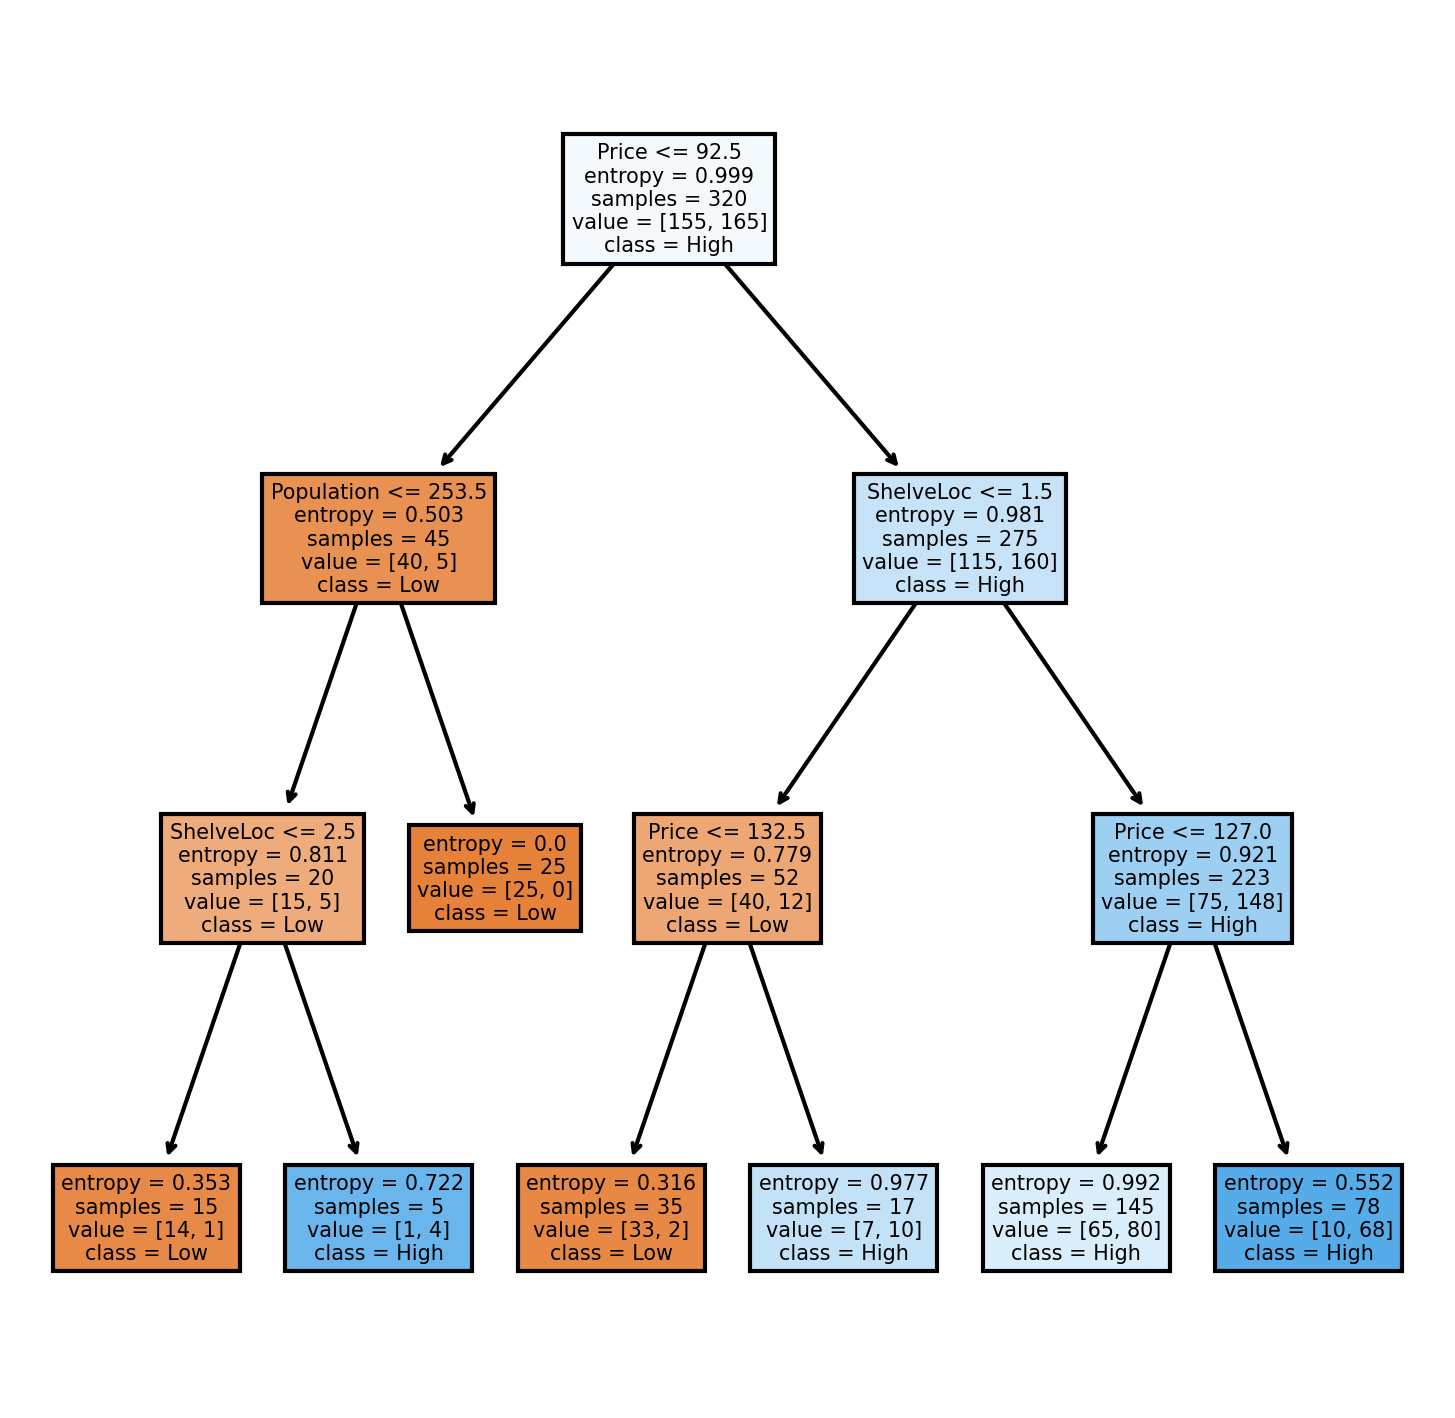

In [101]:
fn=['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urba','US']
cn=['Low','High']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [102]:
text = tree.export_text(model,max_depth=3)  
print(text) 

|--- feature_4 <= 92.50
|   |--- feature_3 <= 253.50
|   |   |--- feature_5 <= 2.50
|   |   |   |--- class: 0
|   |   |--- feature_5 >  2.50
|   |   |   |--- class: 1
|   |--- feature_3 >  253.50
|   |   |--- class: 0
|--- feature_4 >  92.50
|   |--- feature_5 <= 1.50
|   |   |--- feature_4 <= 132.50
|   |   |   |--- class: 0
|   |   |--- feature_4 >  132.50
|   |   |   |--- class: 1
|   |--- feature_5 >  1.50
|   |   |--- feature_4 <= 127.00
|   |   |   |--- class: 1
|   |   |--- feature_4 >  127.00
|   |   |   |--- class: 1



In [103]:
model.feature_importances_ 

array([0.        , 0.        , 0.        , 0.06673645, 0.61092935,
       0.32233421, 0.        , 0.        , 0.        , 0.        ])

In [104]:
import pandas as pd 

feature_imp = pd.Series(model.feature_importances_,index=fn).sort_values(ascending=False) 
feature_imp

Price          0.610929
ShelveLoc      0.322334
Population     0.066736
CompPrice      0.000000
Income         0.000000
Advertising    0.000000
Age            0.000000
Education      0.000000
Urba           0.000000
US             0.000000
dtype: float64

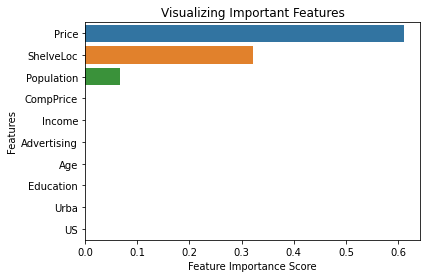

In [105]:
#create a barplot for Visulization

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [106]:
#Predicting on test data
preds = model.predict(X_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category  

1    53
0    27
dtype: int64

In [107]:
preds 

array([0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1], dtype=uint8)

In [108]:
#create Cross tab
pd.crosstab(y_test,preds)

col_0,0,1
sale_Low,,
0,23,20
1,4,33


In [109]:
# Accuracy 
np.mean(preds==y_test)

0.7

# Building Decision Tree Classifier (CART) using Gini Criteria

In [110]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [111]:
model_gini.fit(X_train, y_train) 

DecisionTreeClassifier(max_depth=3)

In [112]:
#Prediction and computing the accuracy
pred1=model.predict(X_test)
pred1

array([0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1], dtype=uint8)

In [113]:
np.mean(pred1==y_test) 

0.7

In [114]:
model.feature_importances_ 

array([0.        , 0.        , 0.        , 0.06673645, 0.61092935,
       0.32233421, 0.        , 0.        , 0.        , 0.        ])

In [115]:
#Decesion Tree Regrasion Example

from sklearn.tree import DecisionTreeRegressor 


In [116]:
df1=df.iloc[:,1:11]
df1

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,138,73,11,276,120,3,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,3,38,13,1,0
5,124,113,13,501,72,3,78,16,0,1
6,115,105,0,45,108,2,71,15,1,0
7,136,81,15,425,120,1,67,10,1,1
8,132,110,0,108,124,2,76,10,0,0
9,132,113,0,131,124,2,76,17,0,1


In [117]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   CompPrice    400 non-null    int64
 1   Income       400 non-null    int64
 2   Advertising  400 non-null    int64
 3   Population   400 non-null    int64
 4   Price        400 non-null    int64
 5   ShelveLoc    400 non-null    int64
 6   Age          400 non-null    int64
 7   Education    400 non-null    int64
 8   Urban_Yes    400 non-null    uint8
 9   US_Yes       400 non-null    uint8
dtypes: int64(8), uint8(2)
memory usage: 25.9 KB


In [118]:
array=df.values
X=array[:,0:9]
Y=array[:,9]

In [119]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [120]:
model=DecisionTreeClassifier(max_depth=3) 
model.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=3)

In [121]:
#find the test Accuracy
model.score(X_test,Y_test)

0.6742424242424242

In [122]:
#find the train Accuracy
model.score(X_train,Y_train)

0.7425373134328358